In [1]:
import h5py
import hdf5plugin
import numpy as np
import os
import scipy.io as sio
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from PIL import Image, ImageSequence

%matplotlib inline

In [13]:
data_path = '/Volumes/Extreme Pro/PETRA_P10_November2023/Beamtime_11017686/XPCS_Scans/Particle_2/'

det_files = np.array(['298K/NPS_01_00219/e4m/','305K/NPS_01_00334/e4m/',
                '315K/NPS_01_00416/e4m/','325K/NPS_01_00552/e4m/',
                '345K/NPS_01_00579/e4m/','365K/NPS_01_00709/e4m/',
                '385K/NPS_01_00779/e4m/','405K/NPS_01_00796/e4m/','350K_Cool/NPS_01_00868/e4m/'])


result_files = np.array(['298K/NPS_01_00219/result/NPS_01_00219_result.mat','305K/NPS_01_00334/result/NPS_01_00334_result.mat',
                '315K/NPS_01_00416/result/NPS_01_00416_result.mat','325K/NPS_01_00552/result/NPS_01_00552_result.mat',
                '345K/NPS_01_00579/result/NPS_01_00579_result.mat','365K/NPS_01_00709/result/NPS_01_00709_result.mat',
                '385K/NPS_01_00779/result/NPS_01_00779_result.mat','405K/NPS_01_00796/result/NPS_01_00796_result.mat',])

dir_path = data_path+det_files[-3]

In [6]:
dir_path = '/Users/eriklamb/Documents/Data/APS/8_ID_E/NBH/'

file = 'A181_NaBH_att000015_149K_001_001.h5'

In [7]:
#Check that path exists
if not os.path.exists(dir_path):
    print(f"Directory '{dir_path}' Does Not Exist!")

#Load File Names
file_list = np.sort(os.listdir(dir_path)).tolist()

#Remove first element if it's DS_Store
if file_list[0] == '.DS_Store':
    file_list.remove(file_list[0])
    
for f in file_list:
    print(f)
 
#Retrieve number of files
num_files = len(file_list)

A181_NaBH_att000015_149K_001_001.h5


In [8]:
def print_h5_item(item, indent=''):
    """
    Recursively print the contents of an h5py group or dataset.
    
    Args:
    - item: The h5py group or dataset to print.
    - indent: A string of spaces used to indent nested items for better readability.
    """
    
    if isinstance(item, h5py.Group):  # Check if item is a group
        for key, subitem in item.items():
            print(f"{indent}/{key}")  # Print group name
            print_h5_item(subitem, indent + '    ')  # Recursively print contents of the group with additional indentation
    elif isinstance(item, h5py.Dataset):  # Check if item is a dataset
        print(f"{indent}[Dataset] Shape: {item.shape}, Type: {item.dtype}")
        # To print actual data, uncomment the line below. Be cautious with large datasets.
        # print(item[:])
        
        
def make_detector_movie(imgs, scan_var,period, fig, ax, filename, clims, fps):
    # Makes an animation of the detector images stored in `imgs`.
    # `fig` and `ax` are the Figure and Axes objects used to plot each movie frame
    # `filename` is the name of the output .gif file
    # `clims` is the colormap range
    # `fps` is the frame rate (frames per second) of the movie
    Nt = imgs.shape[0]
    im = ax.imshow(imgs[0,:,:], cmap='nipy_spectral',norm=LogNorm(vmin=clims[0], vmax=clims[1]))
    
    def func(ii):
        im.set_data(imgs[ii,:,:])
        ax.set_title('Time = ' + str(period*scan_var[ii-1]) + ' seconds')
        return im
    
    anim = FuncAnimation(fig, func, frames=range(1,Nt))
    anim.save(filename + '2.gif', writer=PillowWriter(fps=fps))

In [9]:
#Set the file name
filename = dir_path+file
print(filename)

with h5py.File(filename, 'r') as f:
    print_h5_item(f)

/Users/eriklamb/Documents/Data/APS/8_ID_E/NBH/A181_NaBH_att000015_149K_001_001.h5
/entry
    /data
        /data
            [Dataset] Shape: (10000, 1813, 1558), Type: uint16
    /instrument
        /NDAttributes
            /NDArrayEpicsTSSec
                [Dataset] Shape: (10000,), Type: uint32
            /NDArrayEpicsTSnSec
                [Dataset] Shape: (10000,), Type: uint32
            /NDArrayTimeStamp
                [Dataset] Shape: (10000,), Type: float64
            /NDArrayUniqueId
                [Dataset] Shape: (10000,), Type: int32
        /detector
            /NDAttributes
            /data
                [Dataset] Shape: (10000, 1813, 1558), Type: uint16
        /performance
            /timestamp
                [Dataset] Shape: (10000, 5), Type: float64


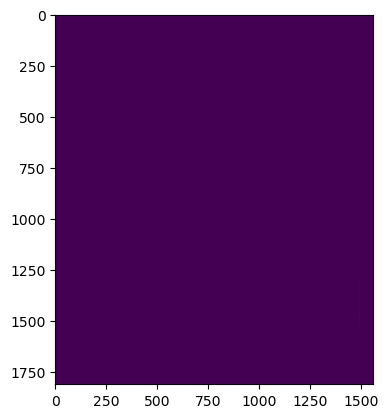

In [12]:
#Set ROI and Set Hot-Pixels to Zero
roi = [0,2069,0,2166]

det = np.array(h5py.File(filename, 'r')['entry/data/data/'])
#det[det>1000000] = 0 
#det[det<=1] = 0 

plt.imshow(np.sum(det[0:100,:,:],axis=0))

<IPython.core.display.Javascript object>


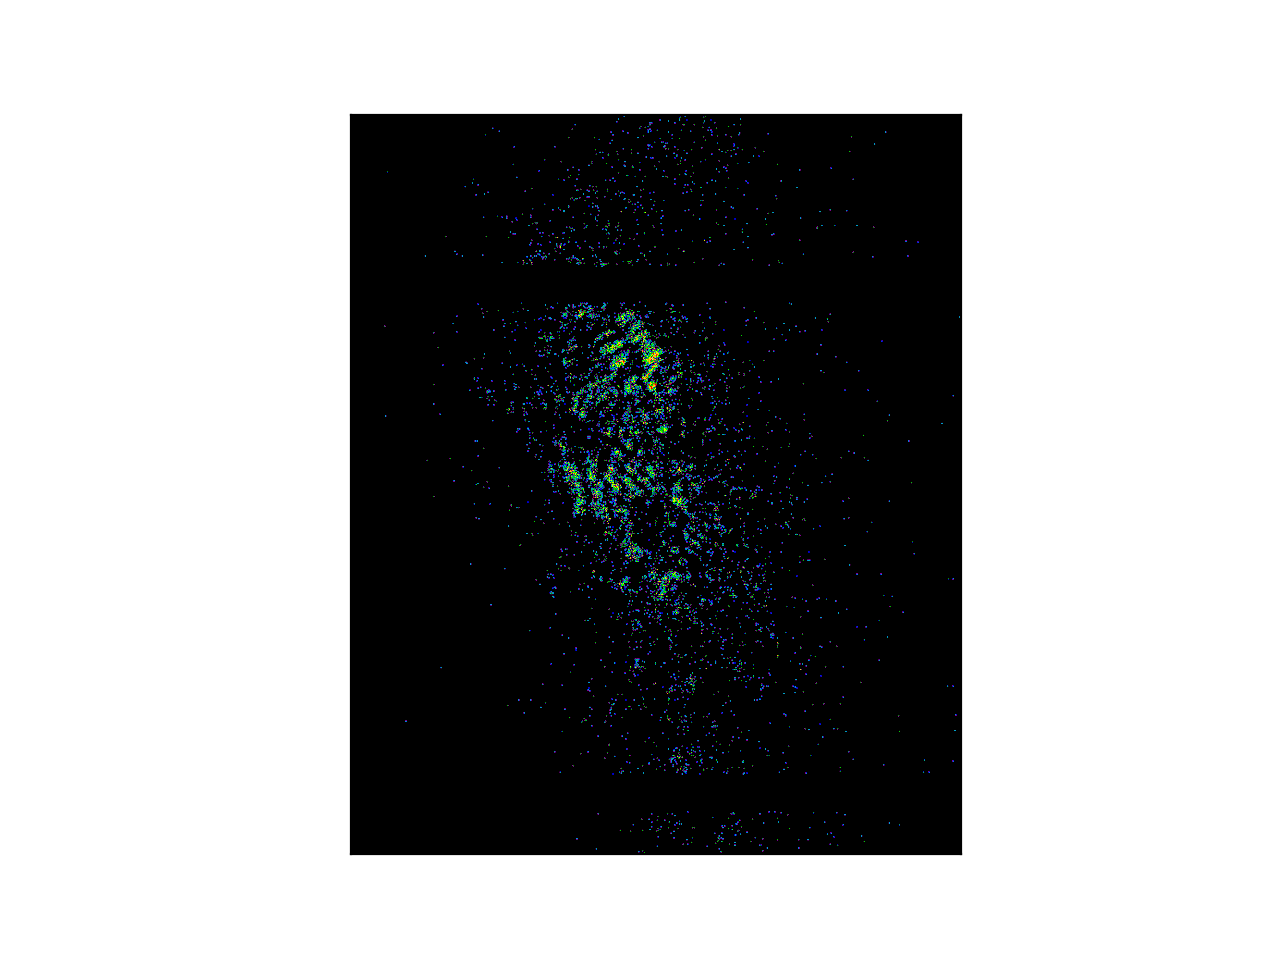

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook

roi1 = [900,1700,1180,1840] #vertup, vertlow, horizleft, horizright
#roi1=[0,2069,0,2166]

v = [1,7]

fig, ax = plt.subplots()

ax.imshow(np.sum(det[0:1,roi1[0]:roi1[1],roi1[2]:roi1[3]],axis=0)+1,cmap='nipy_spectral',norm=LogNorm(vmin=v[0], vmax=v[1]))

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


In [24]:
images = det[:,roi1[0]:roi1[1],roi1[2]:roi1[3]]
frames = np.arange(1,len(images))

In [25]:
result_path=data_path+result_files[2]
result = sio.loadmat(result_path)
t = np.array(result['ccdimginfo'][0][0]['result']['delay'][0][0][0][0][:,:][0,:])

<IPython.core.display.Javascript object>


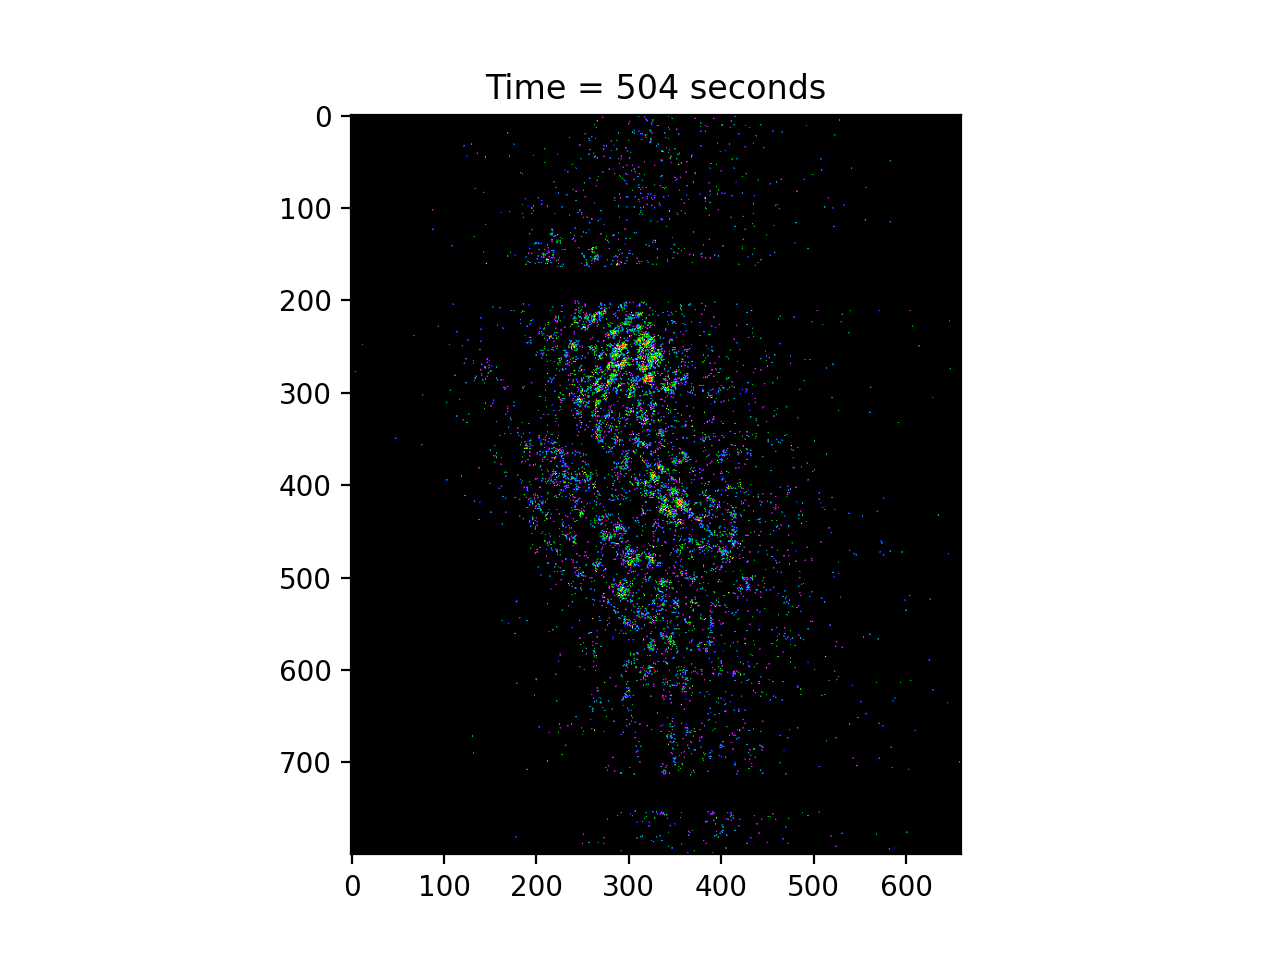

In [29]:
fig, ax = plt.subplots()
    
# YOUR CODE HERE
make_detector_movie(images+1, frames,3, fig, ax, file_list[1][:-3], (v[0],v[1]), 25)